In [1]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "Dataset/Train"

training_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.15,horizontal_flip=True,fill_mode='nearest')

VALIDATION_DIR = "Dataset/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	shuffle = True,
	class_mode='categorical',
  batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
	shuffle = True,
  batch_size= 14
)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

#Shape and size of Input
input_tensor = Input(shape=(224, 224, 3))

#InceptionV3 is a Keras image classification model
#Imagenet is widely used for image classification, hence we used it here for weights
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)


x = base_model.output
# Global spatial layer added to reduce over-fitting
x = GlobalAveragePooling2D()(x)

#Normal Dense layer with array size of 2048
x = Dense(2048, activation='relu')(x)

#Dropout layer with 0.25 input units dropped
x = Dropout(0.25)(x)

#Normal Dense layer with array size of 1024
x = Dense(1024, activation='relu')(x)

#Dropout layer with 0.2 input units dropped
x = Dropout(0.2)(x)

#Classification using softmax activation function into 2 categories.
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])



311
311


In [3]:
history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
14/14 [==============================] - 210s 14s/step - loss: 9.7630 - acc: 0.8002 - val_loss: 0.1097 - val_acc: 0.9592
Epoch 2/20
14/14 [==============================] - 201s 14s/step - loss: 0.1225 - acc: 0.9545 - val_loss: 0.1319 - val_acc: 0.9541
Epoch 3/20
14/14 [==============================] - 205s 14s/step - loss: 0.3892 - acc: 0.8947 - val_loss: 0.1789 - val_acc: 0.9031
Epoch 4/20
14/14 [==============================] - 204s 14s/step - loss: 0.1283 - acc: 0.9533 - val_loss: 0.2349 - val_acc: 0.9337
Epoch 5/20
14/14 [==============================] - 205s 14s/step - loss: 0.3252 - acc: 0.9067 - val_loss: 0.1128 - val_acc: 0.9643
Epoch 6/20
14/14 [==============================] - 202s 15s/step - loss: 0.2826 - acc: 0.9360 - val_loss: 0.1304 - val_acc: 0.9541
Epoch 7/20
14/14 [==============================] - 203s 14s/step - loss: 0.1506 - acc: 0.9533 - val_loss: 0.1468 - val_acc: 0.9592
Epoch 8/20
14/14 [==============================] - 170s 12s/step - loss: 0.

In [4]:

for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)
print(len(base_model.layers))

D:\anaconda\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
14/14 [==============================] - 129s 9s/step - loss: 0.9398 - acc: 0.7135 - val_loss: 0.1658 - val_acc: 0.9745
Epoch 2/10
14/14 [==============================] - 125s 9s/step - loss: 0.5577 - acc: 0.8026 - val_loss: 0.1427 - val_acc: 0.9694
Epoch 3/10
14/14 [==============================] - 124s 9s/step - loss: 0.3152 - acc: 0.8660 - val_loss: 0.1325 - val_acc: 0.9745
Epoch 4/10
14/14 [==============================] - 125s 9s/step - loss: 0.1793 - acc: 0.9175 - val_loss: 0.1297 - val_acc: 0.9643
Epoch 5/10
14/14 [==============================] - 126s 9s/step - loss: 0.1527 - acc: 0.9264 - val_loss: 0.1293 - val_acc: 0.9592
Epoch 6/10
14/14 [==============================] - 126s 9s/step - loss: 0.1282 - acc: 0.9402 - val_loss: 0.1281 - val_acc: 0.9592
Epoch 7/10
14/14 [==============================] - 126s 9s/step - loss: 0.1045 - acc: 0.9569 - val_loss: 0.1287 - val_acc: 0.9541
Epoch 8/10
14/14 [==============================] - 126s 9s/step - loss: 0.0965 - a

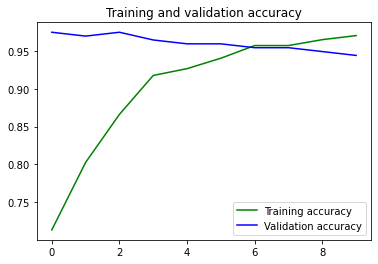

<Figure size 432x288 with 0 Axes>

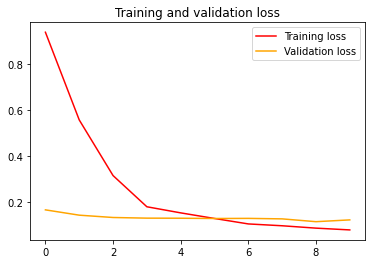

<Figure size 432x288 with 0 Axes>

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [6]:
model.save("firemodel.h5")